# Exploring High Dimension data

High-dimensional data refers to datasets with a large number of features (variables). This can pose challenges for data analysis and machine learning, such as:

1. **Curse of Dimensionality**: As the number of dimensions increases, the volume of the space increases exponentially, making the data sparse. This sparsity makes it difficult to find patterns and can lead to overfitting.
2. **Computational Complexity**: High-dimensional data requires more computational resources for processing and analysis.
3. **Visualization**: It is difficult to visualize data beyond three dimensions.

### Dimensionality Reduction Techniques

Dimensionality reduction techniques help to reduce the number of features while retaining as much information as possible. Some common techniques include:

1. **Principal Component Analysis (PCA)**:
   - PCA transforms the data into a new coordinate system where the greatest variance by any projection of the data comes to lie on the first coordinate (called the first principal component), the second greatest variance on the second coordinate, and so on.
   - It is a linear technique.

   ```python
   from sklearn.decomposition import PCA

   pca = PCA(n_components=2)
   reduced_data = pca.fit_transform(data)
   ```

2. **Linear Discriminant Analysis (LDA)**:
   - LDA is used for classification problems. It projects the data in a way that maximizes the separation between multiple classes.
   - It is also a linear technique.

   ```python
   from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

   lda = LDA(n_components=2)
   reduced_data = lda.fit_transform(data, labels)
   ```

3. **t-Distributed Stochastic Neighbor Embedding (t-SNE)**:
   - t-SNE is a non-linear technique that is particularly good for visualizing high-dimensional data.
   - It reduces the dimensions while preserving the distances between points as much as possible.

   ```python
   from sklearn.manifold import TSNE

   tsne = TSNE(n_components=2)
   reduced_data = tsne.fit_transform(data)
   ```

4. **Autoencoders**:
   - Autoencoders are a type of neural network used to learn efficient codings of input data.
   - They are non-linear and can capture complex relationships in the data.

   ```python
   from keras.layers import Input, Dense
   from keras.models import Model

   input_dim = data.shape[1]
   encoding_dim = 2

   input_layer = Input(shape=(input_dim,))
   encoded = Dense(encoding_dim, activation='relu')(input_layer)
   decoded = Dense(input_dim, activation='sigmoid')(encoded)

   autoencoder = Model(input_layer, decoded)
   encoder = Model(input_layer, encoded)

   autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
   autoencoder.fit(data, data, epochs=50, batch_size=256, shuffle=True)

   reduced_data = encoder.predict(data)
   ```

These techniques help in reducing the dimensionality of the data, making it easier to analyze and visualize while mitigating the issues associated with high-dimensional data.



## steps

* drop columns - for example if add nothing (no variance)

In [5]:
import pandas as pd
import numpy as np

pokemon = pd.read_csv('pokemon.csv')
print(pokemon.head(3))


   #       Name Type 1  Type 2  Total  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0  1  Bulbasaur  Grass  Poison    318  45      49       49       65       65   
1  2    Ivysaur  Grass  Poison    405  60      62       63       80       80   
2  3   Venusaur  Grass  Poison    525  80      82       83      100      100   

   Speed  Generation  Legendary  
0     45           1      False  
1     60           1      False  
2     80           1      False  


In [6]:

print(pokemon.describe())

                #      Total          HP      Attack     Defense     Sp. Atk  \
count  800.000000  800.00000  800.000000  800.000000  800.000000  800.000000   
mean   362.813750  435.10250   69.258750   79.001250   73.842500   72.820000   
std    208.343798  119.96304   25.534669   32.457366   31.183501   32.722294   
min      1.000000  180.00000    1.000000    5.000000    5.000000   10.000000   
25%    184.750000  330.00000   50.000000   55.000000   50.000000   49.750000   
50%    364.500000  450.00000   65.000000   75.000000   70.000000   65.000000   
75%    539.250000  515.00000   80.000000  100.000000   90.000000   95.000000   
max    721.000000  780.00000  255.000000  190.000000  230.000000  194.000000   

          Sp. Def       Speed  Generation  
count  800.000000  800.000000   800.00000  
mean    71.902500   68.277500     3.32375  
std     27.828916   29.060474     1.66129  
min     20.000000    5.000000     1.00000  
25%     50.000000   45.000000     2.00000  
50%     70.0000

* could look for columns with std = 0, min = max for example

In [7]:
pokemon.describe(exclude=[np.number])

,Name,Type 1,Type 2,Legendary
count,800,800,414,800
unique,800,18,18,2
top,Skrelp,Water,Flying,False
freq,1,112,97,735


notice that there legendary is binary - True/False  

### Feature Selection vs. Feature Extraction

**Feature Selection**:
- **Definition**: The process of selecting a subset of relevant features (variables) from the original dataset.
- **Goal**: To improve model performance by removing irrelevant or redundant features.
- **Techniques**: 
  - Filter methods (e.g., correlation, chi-square)
  - Wrapper methods (e.g., recursive feature elimination)
  - Embedded methods (e.g., LASSO, decision trees)

**Feature Extraction**:
- **Definition**: The process of transforming the original features into a new set of features.
- **Goal**: To create new features that better capture the underlying structure of the data.
- **Techniques**:
  - Principal Component Analysis (PCA)
  - Linear Discriminant Analysis (LDA)
  - t-Distributed Stochastic Neighbor Embedding (t-SNE)
  - Autoencoders

In summary, feature selection chooses a subset of existing features, while feature extraction creates new features from the original ones.

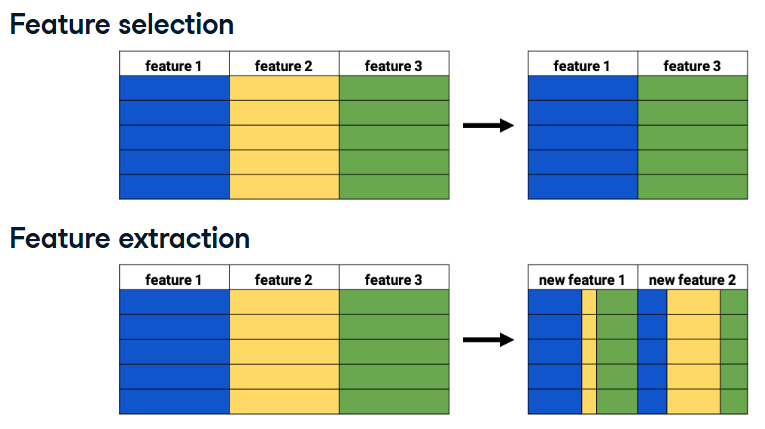

### pair plot

A pairplot is not directly used for feature selection, but it can be useful in the feature selection process. Here's how:

### Pairplot
- **Definition**: A pairplot is a grid of scatter plots for each pair of features in a dataset, along with histograms or density plots for each individual feature.
- **Purpose**: It helps visualize the relationships between features and the distribution of individual features.

### Usefulness in Feature Selection
- **Correlation**: By examining the scatter plots, you can identify highly correlated features. Highly correlated features may be redundant, and you might consider removing one of them.
- **Patterns**: It helps in identifying patterns, trends, and outliers in the data, which can inform decisions about which features to keep or remove.
- **Class Separation**: If the dataset includes class labels, pairplots can show how well features separate different classes, helping to identify the most informative features.

### Example


In [2]:
import seaborn as sns
import pandas as pd

# Load dataset
ansur_df = pd.read_csv('ANSUR_II_MALE.csv')


In [3]:
print(ansur_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 4082 entries, 0 to 4081
Data columns (total 99 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Branch                          4082 non-null   object 
 1   Component                       4082 non-null   object 
 2   Gender                          4082 non-null   object 
 3   abdominalextensiondepthsitting  4082 non-null   int64  
 4   acromialheight                  4082 non-null   int64  
 5   acromionradialelength           4082 non-null   int64  
 6   anklecircumference              4082 non-null   int64  
 7   axillaheight                    4082 non-null   int64  
 8   balloffootcircumference         4082 non-null   int64  
 9   balloffootlength                4082 non-null   int64  
 10  biacromialbreadth               4082 non-null   int64  
 11  bicepscircumferenceflexed       4082 non-null   int64  
 12  bicristalbreadth                4082 no

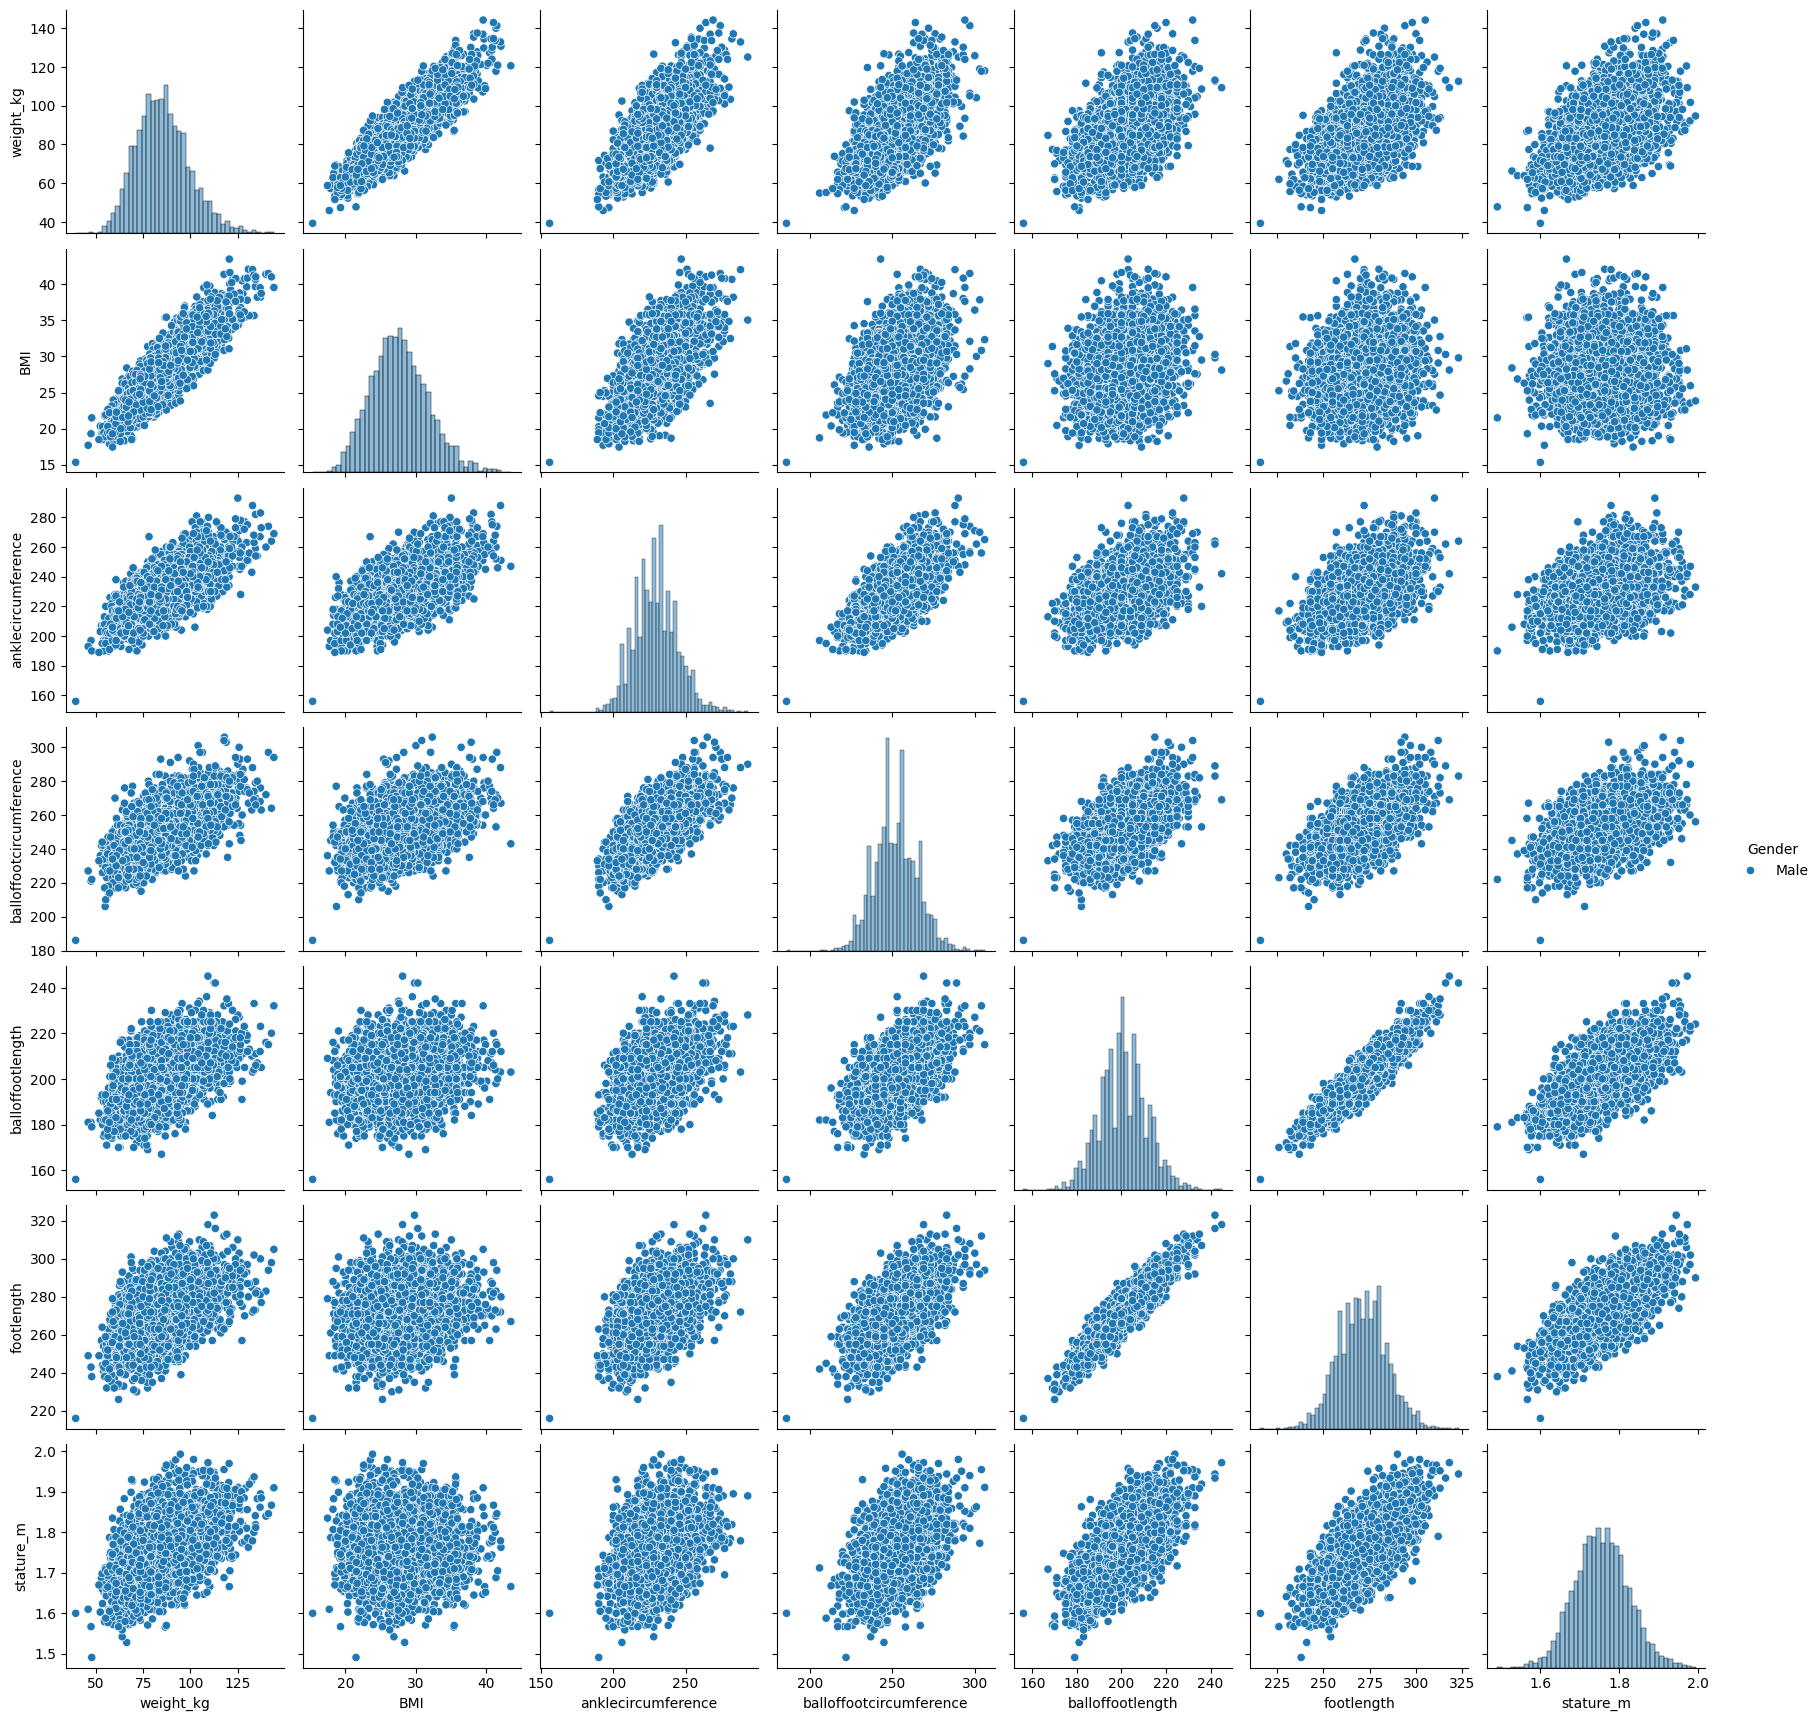

In [8]:
# subset of columns
ansur_df_subset = ansur_df[['Gender','weight_kg', 'BMI','anklecircumference', 'balloffootcircumference', 'balloffootlength', 'footlength', 'stature_m'  ]]
# Create pairplot
sns.pairplot(ansur_df_subset, hue='Gender', diag_kind='hist')